In [139]:
library(ggplot2)
# library(ggmosaic)
data = diamonds[1:500,]
str(data)

tibble [500 × 10] (S3: tbl_df/tbl/data.frame)
 $ carat  : num [1:500] 0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num [1:500] 61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num [1:500] 55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int [1:500] 326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num [1:500] 3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num [1:500] 3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num [1:500] 2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


## Q6

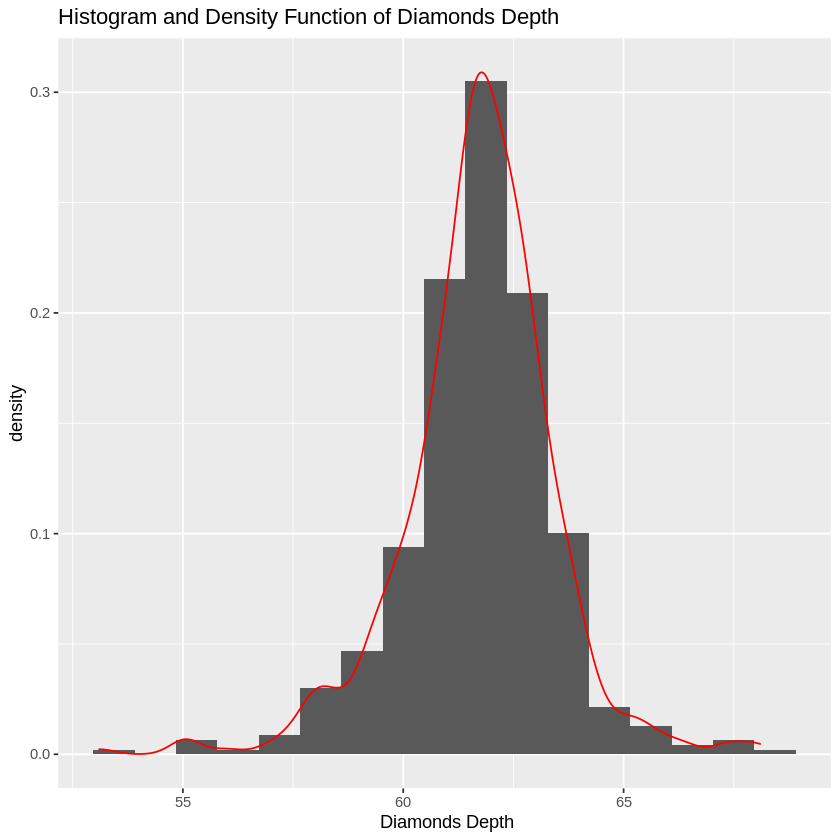

In [140]:
##Q6
#Q6 A
data_Q6 = data$depth
plot <- ggplot(data = data, aes(x = data_Q6)) + 
  geom_histogram(aes(y = ..density..), bins = 17) +
  geom_density(color = 'red')
plot + labs(x = " Diamonds Depth", title = "Histogram and Density Function of Diamonds Depth ")

Histogram is easiest way to illustrate the major features of the distribution of the data in a convenient form. It divids data into seprate bins and count how many data is in each bin. Therefore it can represents the data in the form of frequency. with appropiate choose of bin siz, histogram can be a very good estimate of density funciton.


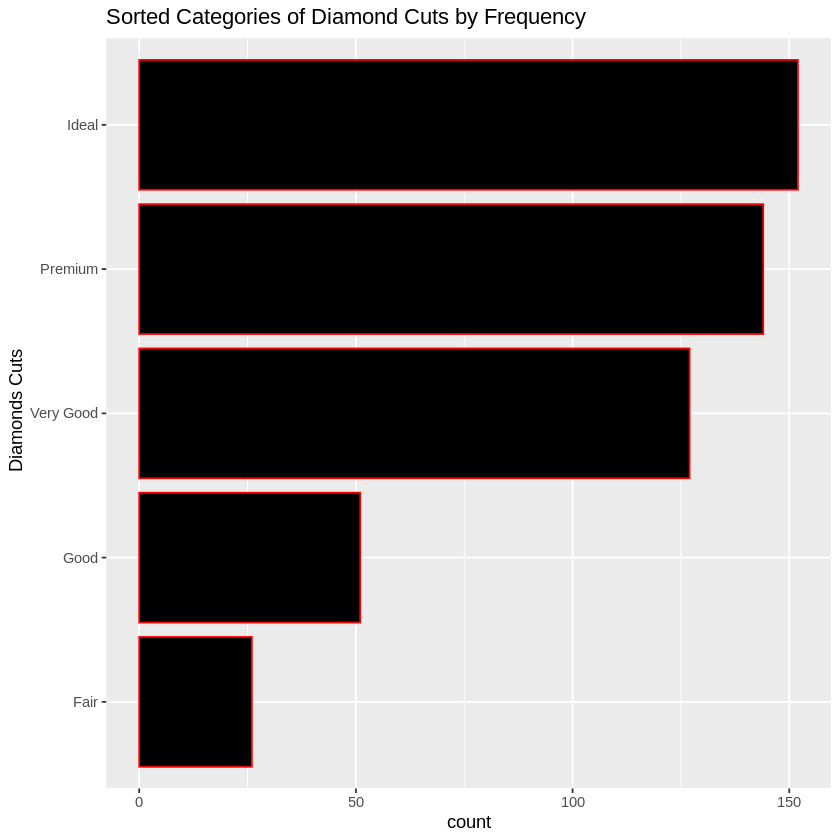

In [141]:
#Q6B
ggplot(data = data,mapping = aes(x = cut)) + 
  geom_bar( fill = "black", color = "red")  + coord_flip() +labs(x = " Diamonds Cuts", title = "Sorted Categories of Diamond Cuts by Frequency")


Bar charts usually present categorical variables, discrete variables or continuous variables grouped in class intervals, it is used to present data in a visual form so that the reader may readily recognize patterns or trends.

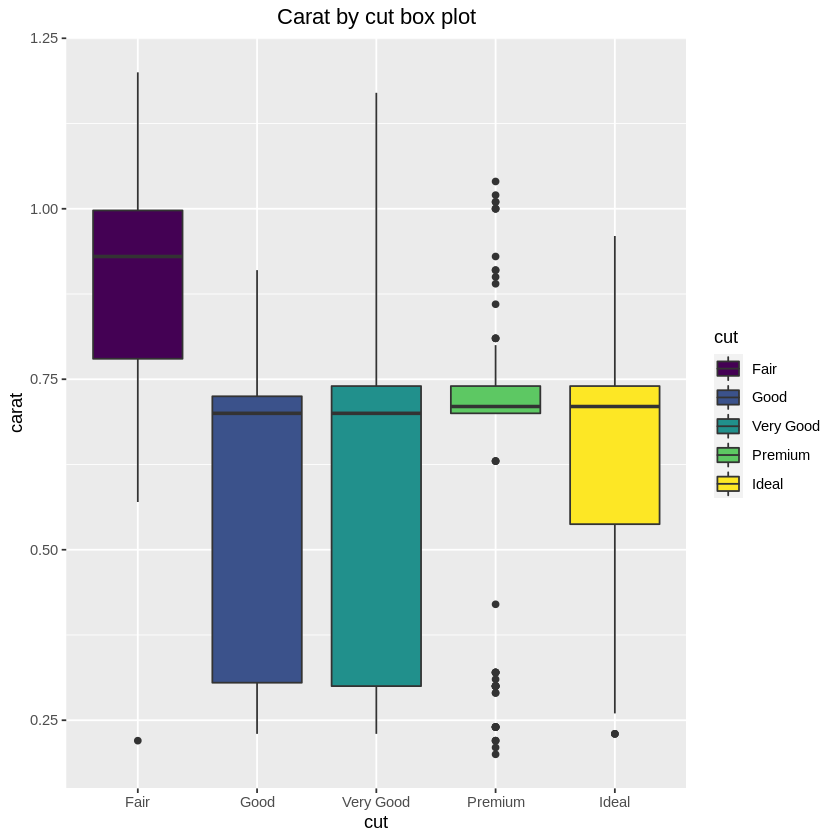

In [142]:

#Q6C
ggplot(data = data, mapping= aes(x = carat, y = cut, fill = cut)) + 
  geom_boxplot() +
  coord_flip() + labs(title = "Carat by cut box plot")+
  theme(plot.title = element_text(hjust = 0.5))



Box plots typically detail the minimum value, 25th percentile, median, 75th percentile and the maximum value in a visual manner. It kind of shows density of variable, it’s especially useful for indicating whether a distribution is skewed and whether there are potential unusual observations (outliers) in the data set. A box plot is ideal for comparing distributions because the centre, spread and overall range are immediately apparent.

In [146]:
p1<-ggplot(data=data)+geom_mosaic(aes(x=product(color, cut),fill=color))

In [147]:
compt_perc=function(x){
   d=c(x,1)-c(0,x)
   d[-length(d)]
 }

In [148]:
library(tidyverse)
p1d<- ggplot_build(p1)$data %>% as.data.frame() %>% filter(.wt > 0)
head(p1d)

,fill,x__cut,.wt,xmin,xmax,ymin,ymax,level,x__fill__colour,.n,⋯,width,linetype,fontsize,shape,colour,size,alpha,stroke,linewidth,weight
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,#443A83FF,Fair,6,0,0.04992,0.009534626,0.2271021,2,E,6,⋯,0.75,solid,5,19,NA,0.1,0.8,0.1,0.1,1
2,#31688EFF,Fair,6,0,0.04992,0.236636693,0.4542041,2,F,6,⋯,0.75,solid,5,19,NA,0.1,0.8,0.1,0.1,1
3,#21908CFF,Fair,4,0,0.04992,0.463738760,0.6087837,2,G,4,⋯,0.75,solid,5,19,NA,0.1,0.8,0.1,0.1,1
4,#35B779FF,Fair,4,0,0.04992,0.618318346,0.7633633,2,H,4,⋯,0.75,solid,5,19,NA,0.1,0.8,0.1,0.1,1
5,#8FD744FF,Fair,2,0,0.04992,0.772897933,0.8454204,2,I,2,⋯,0.75,solid,5,19,NA,0.1,0.8,0.1,0.1,1
6,#FDE725FF,Fair,4,0,0.04992,0.854955039,1.0000000,2,J,4,⋯,0.75,solid,5,19,NA,0.1,0.8,0.1,0.1,1


In [149]:
compt_perc=function(x){
   d=c(x,1)-c(0,x)
   d[-length(d)]
 }

In [150]:
x=tapply(p1d$ymax,factor(p1d$fill,levels=unique(p1d$fill)),compt_perc)
x=unlist(x)
p1d$percentage=paste0(round(100*x,2),"%")


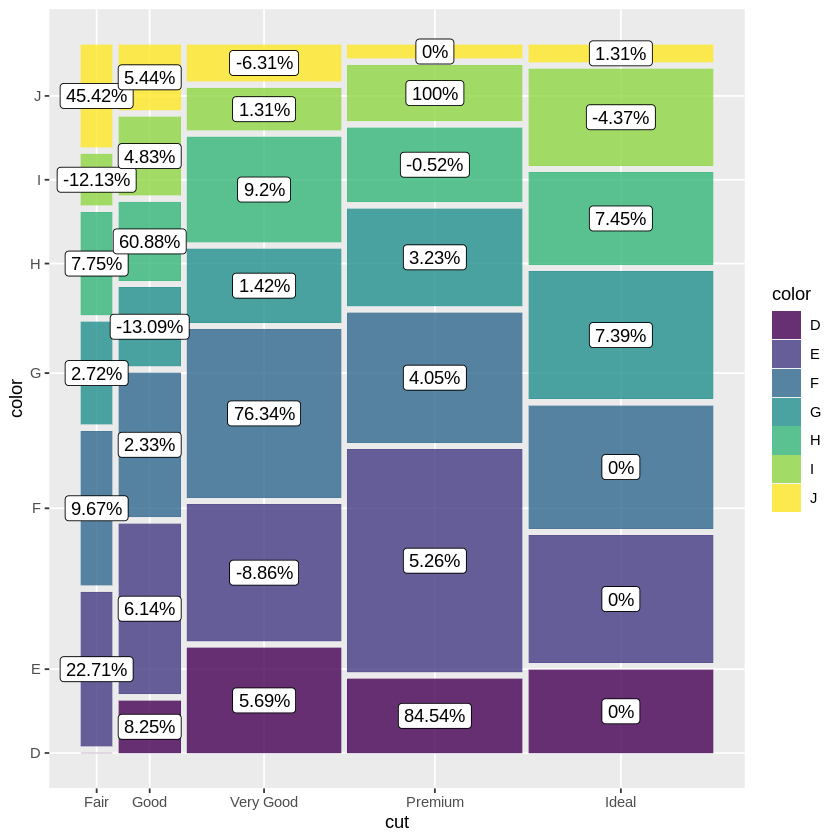

In [151]:
p2<-p1 + 
  geom_label(data = p1d, 
             aes(x = (xmin + xmax)/2, 
                 y = (ymin + ymax)/2, 
                 label = percentage))

p2

Mosaic plots offer us a way to visualize the relationship between two or more categorical variables in a dataset. It helps us to understand how these variables can be related to each other. in the other words It makes possible to recognize relationships between different variables.

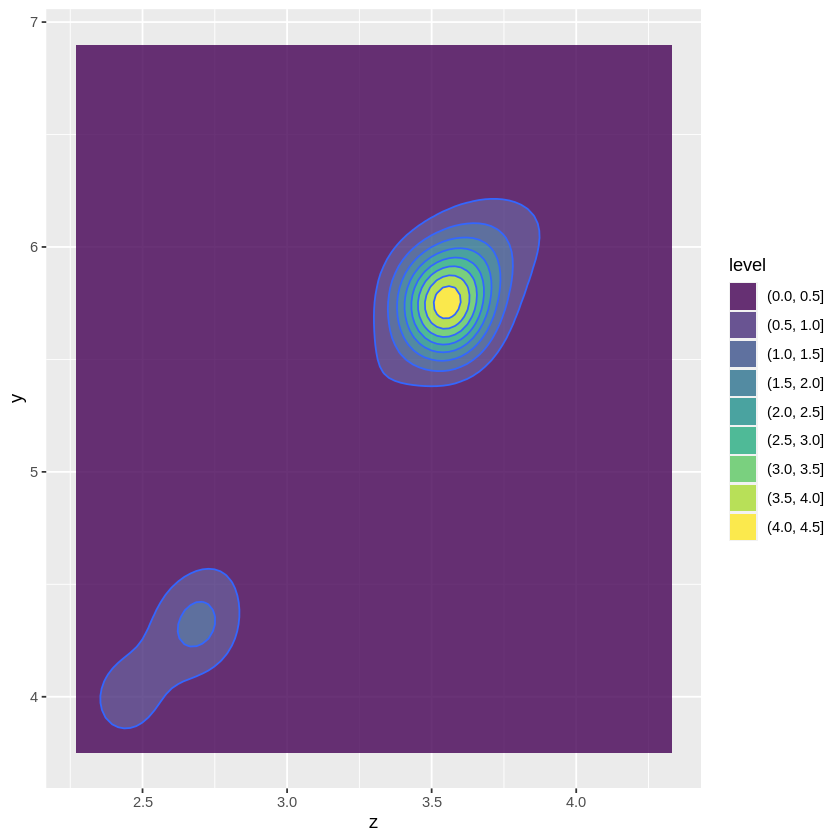

In [ ]:

#Q6E
ggplot(data = data, mapping = aes( x = z, y = y)) + 
  geom_density_2d_filled( alpha = 0.8) + 
  geom_density_2d() 
  

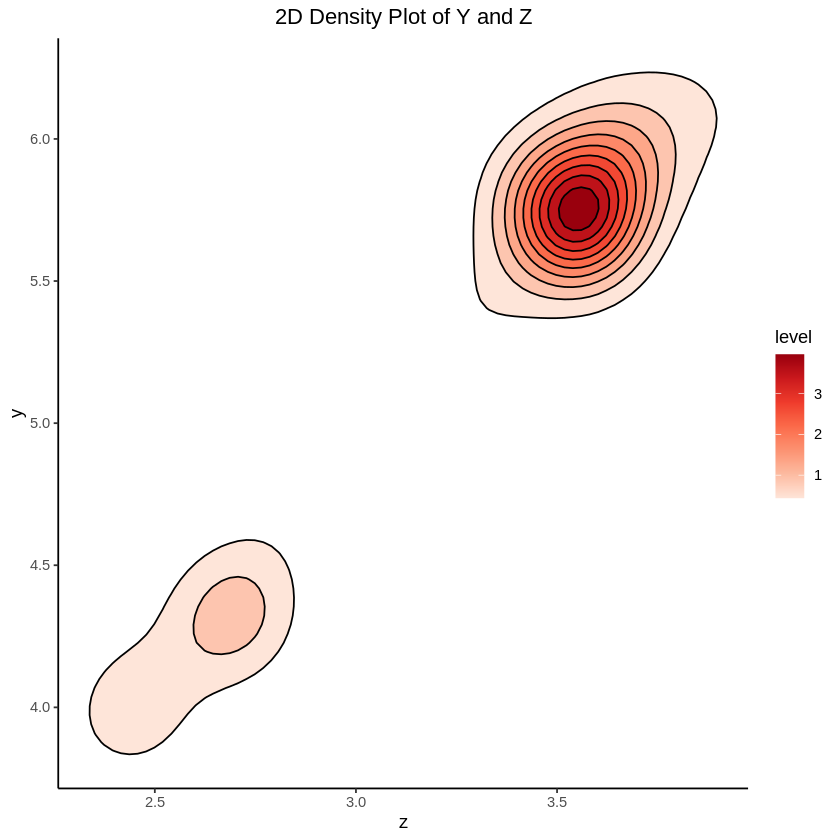

In [37]:
# Q6E

ggplot(data = data, mapping = aes( x = z, y = y))+
  stat_density_2d(geom = "polygon", contour = TRUE,
                 aes(fill = after_stat(level)), colour = "black",
                 bins = 10) +
  scale_fill_distiller(palette = "Reds", direction = 1) +
  theme_classic() + 
  labs(title = "2D Density Plot of Y and Z")+
  theme(plot.title = element_text(hjust = 0.5))



2D Density is used when we want to study relationship between two numeric variables. it shows which regions has higher probability. We can predict data's behaviour if we know its distribution, therfore it can be so helpful.

## Q7


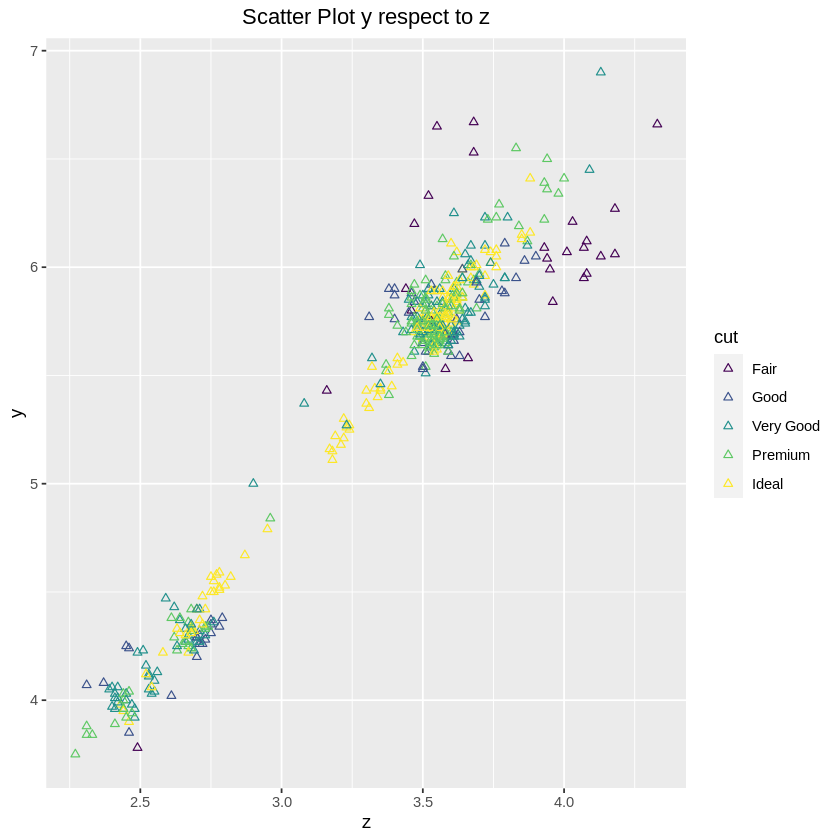

In [154]:
#Q7
ggplot(data = data, mapping = aes(x = z, y = y)) + 
  geom_point(mapping = aes(color = cut), shape = 2)+
   labs(title = "Scatter Plot y respect to z")+
  theme(plot.title = element_text(hjust = 0.5))
  
# ggplot(data = data, mapping = aes(x = z, y = y)) + 
#   geom_point(mapping = aes(color = color), shape = 2)

# ggplot(data = data, mapping = aes(x = z, y = y)) + 
#   geom_point(mapping = aes(color = clarity), shape = 2)



scatter plot are very usefull in small datasets, more specificly it can find out easily whether two variables have relationship. It visualize location of data points so infering would be easy( in small datasets).

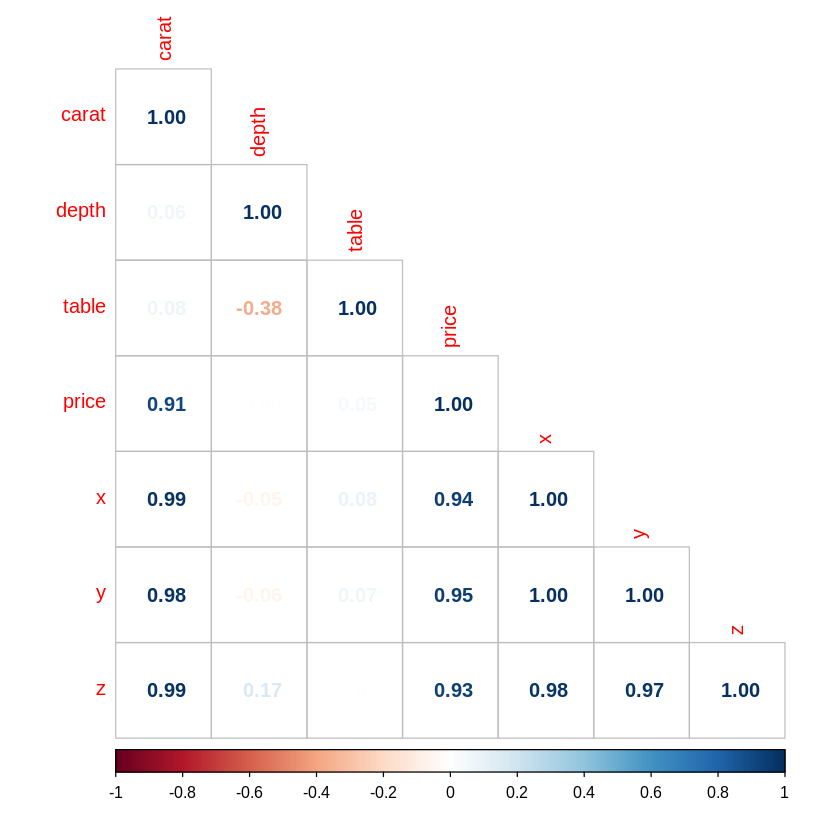

In [32]:

#Q7B

#install.packages('corrplot')
library(corrplot)
num_cols <- unlist(lapply(data, is.numeric)) 
numeric_cols = data[, num_cols]
corr = cor(numeric_cols)
corrplot(corr,method = "number", type = "lower")




It helps to undrestande linear relation(correaltion) between numeric variables of dataset. It gives a quick overview of the whole dataset. It is more used for exploratory purpose than explanatory.

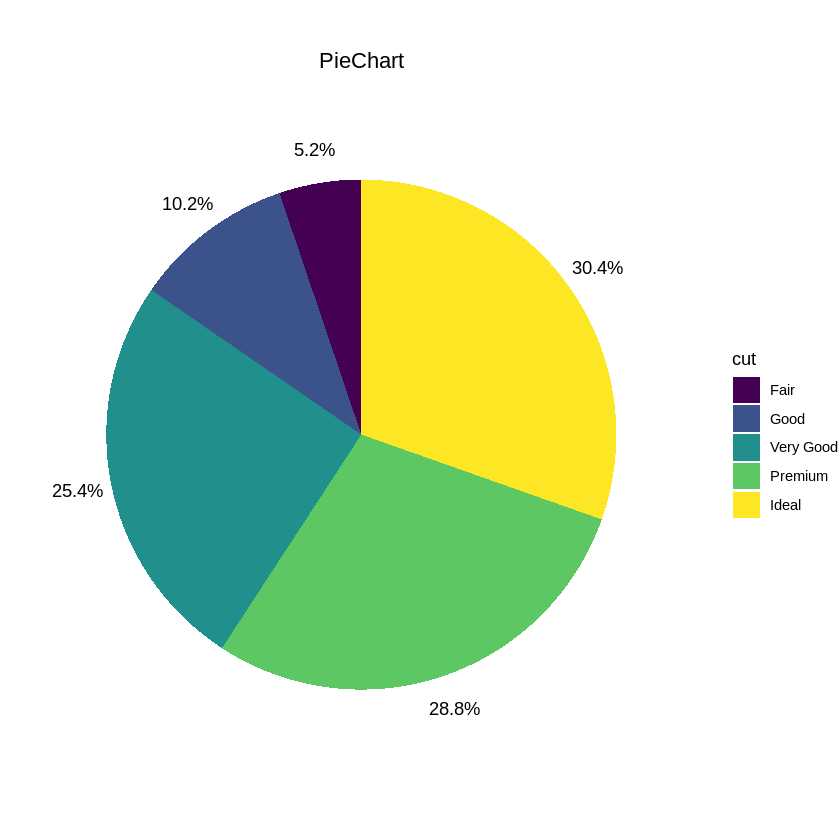

In [36]:
library(ggplot2)
library(dplyr)

# Data transformation
df <- data %>% 
  group_by(cut) %>% # Variable to be transformed
  count() %>% 
  ungroup() %>% 
  mutate(perc = `n` / sum(`n`)) %>% 
  arrange(perc) %>%
  mutate(labels = scales::percent(perc))


ggplot(df, aes(x = "", y = perc, fill = cut)) +
  geom_col() +
  geom_text(aes(x = 1.57,label = labels),
            position = position_stack(vjust = 0.5,)) +
  coord_polar(theta = "y")+
  ggtitle("PieChart") +
  theme_void()+
  theme(plot.title = element_text(hjust = 0.5))


A pie chart is best used when trying to work out the composition of something. If you have categorical data then using a pie chart would work really well as each slice can represent a different category.   
Disadvantages:  
It is not easy to infere the exact value(unless it is mentioned in figure) consequently it is not possible to visualy compare two categories.  
If too many pieces of data are used, pie chart becomes less effective.  
be easily manipulated to yield false impressions.  
Pie charts cannot be used to represent time series data.

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


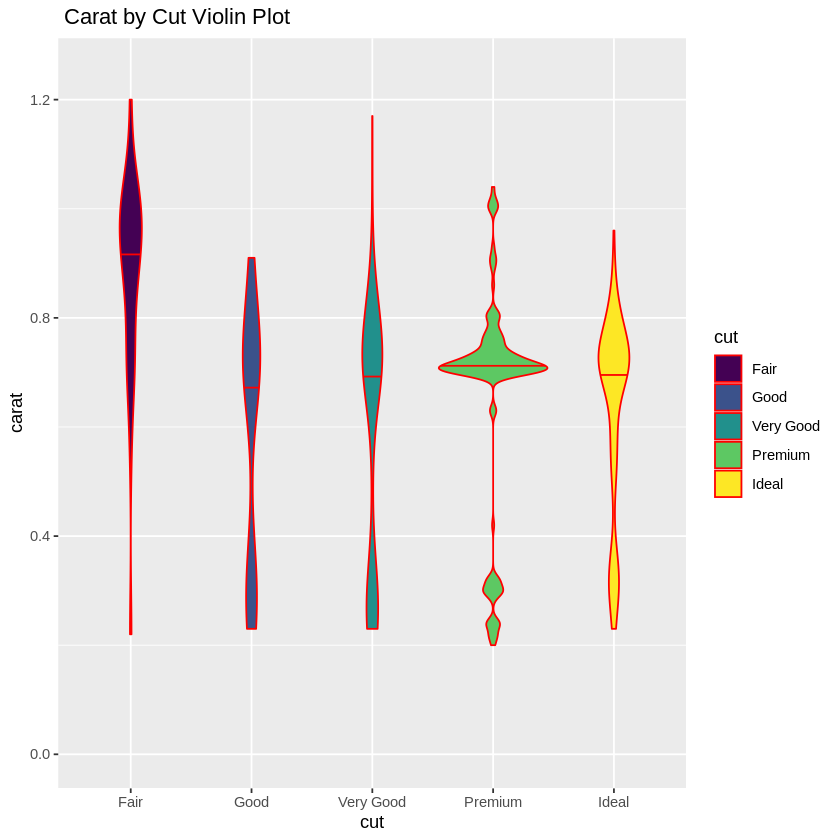

In [57]:
#Q7D

ggplot(data = data) +
  geom_violin(mapping = aes(x = cut, y = carat, fill = cut), draw_quantiles = c(0.5), color = "red")+
  expand_limits(y=c(0.0, 1.25), x=c(0.5,5))+
  ggtitle(" Carat by Cut Violin Plot")
 

Violin plot is so like its ancestor `boxplot` and can show distribution of data and not only data's statistics. it other words it is a combination of the box plot with a kernel density plot.  
`Violin Plot` is especially useful when you want to make a comparison of distributions between multiple groups.

## Q7
Part A

In [ ]:
n <- 50
x_1 <- rexp(n, rate = 1)
x_2 <- rnorm(n, mean = 0, sd = 1)
x_3 <- rcauchy(n, location = 0, scale = 0.5)
x_4 <- runif(n, min = 0, max = 1)


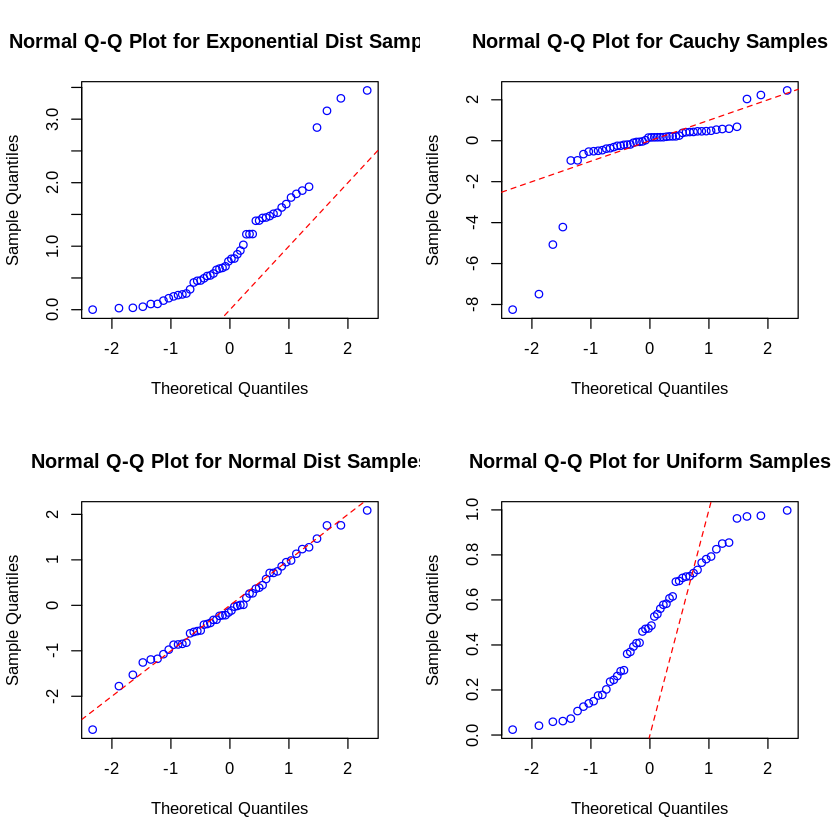

In [110]:
par(mfcol=c(2,2))
qqnorm(x_1, col = 'blue',main= "Normal Q-Q Plot for Exponential Dist Samples")
abline(0, 1, col = 'red', lty=2)
qqnorm(x_2,  col = 'blue', main= "Normal Q-Q Plot for Normal Dist Samples")
abline(0, 1,col = 'red', lty=2)
qqnorm(x_3,  col = 'blue',main= "Normal Q-Q Plot for Cauchy Samples")
abline(0, 1,col = 'red',lty=2)
qqnorm(x_4,  col = 'blue', main= "Normal Q-Q Plot for Uniform Samples")
abline(0, 1, col = 'red', lty=2)


Part B:  
We can see normal samples has exactly lied on x = y line, and Cauchy samples are also similar to the theoritcal normal plot.  
  
Part C:   q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set.  
A 45-degree reference line is also plotted. If the two sets come from a population with the same distribution, the points should fall approximately along this reference line. The greater the departure from this reference line, the greater the evidence for the conclusion that the two data sets have come from populations with different distributions.